### We study the Michaelis Menten Enzyme kinetics system with 4 species as defined by:

$$
\begin{split}
S + E &\rightleftharpoons^{k_f}_{k_b} C \hspace{20pt} \text{Binding and unbinding of substrate S and enzyme E}\\
C &\rightarrow^{k_d} E + X \hspace{20pt} \text{Production of the product X by the complex C, \textit{typically fast}} \\ 
X &\rightarrow^{k_{2X}} \emptyset
\end{split}
$$

In [1]:
push!(LOAD_PATH, "../src/Achedmy/")
using Achedmy
using Pkg
using PyPlot
using Catalyst
using LinearAlgebra
using DifferentialEquations
using LaTeXStrings
using Serialization

In [2]:
enzyme_system = @reaction_network begin
    @species S(t) = 1. E(t) = 0.9 C(t) = 0.1 X(t) = 0.1 
    @parameters k_f = 1. k_b = 0.1 k_d = 1. k_2X = 2. k_2S = .001
   (k_f,k_b), S + E <--> C
   (k_d), C --> E + X
   (k_2X), X --> 0
   (k_2S), S --> 0
end

Model ##ReactionSystem#235
States (4):
  S(t) [defaults to 1.0]
  E(t) [defaults to 0.9]
  C(t) [defaults to 0.1]
  X(t) [defaults to 0.1]
Parameters (5):
  k_f [defaults to 1.0]
  k_b [defaults to 0.1]
  k_d [defaults to 1.0]
  k_2X [defaults to 2.0]
⋮

Graph(enzyme_system)

### Insert some Gillespie time traces with code here!

In [3]:
#Parameters simulation
tstart= 0.
tmax = 9.5
atol = 1e-3 #decrease this value to increase the accuracy of the simulation (components smaller than this get rejected!)
rtol = 1e-2
k_max = 12 #Maximum order of the adaptive time stepper
dtmax = 0.1
dtini = 1e-5 #Minimum time step size!
Γ = 0.9
qmax = 5
qmin = 0.5

0.5

In [4]:
alpha_range = exp10.(range(-1, stop=2, length=4))
println(alpha_range)

[0.1, 1.0, 10.0, 100.0]


In [5]:
@unpack k_f = enzyme_system

SOL = []
VAR = []

for i in alpha_range[3]

    enzyme_system.defaults[k_f] = i

    structure = Achedmy.ReactionStructure(enzyme_system)
    variables = Achedmy.ReactionVariables(structure,"cross")
    sol = Achedmy.solve_dynamics!(structure,variables,selfEnergy = "gSBR", tmax = tmax, tstart = tstart,
                     atol = atol, rtol = rtol , k_max = k_max, dtmax = dtmax, γ = Γ, qmax = qmax, qmin = qmin)

    push!(SOL,sol)
    push!(VAR,variables)

end

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 1.5575657478436392e-5
t: 2.722565114770905e-5
t: 6.48355194187355e-5
t: 0.00014787936169926053
t: 0.0003174407495212999
t: 0.0005757805550443141
t: 0.0010420418817888681
t: 0.0016957552245889932
t: 0.0026910490115579382
t: 0.003988431102079915
t: 0.005753709571102995
t: 0.007944092456640796
t: 0.010697591023246949
t: 0.01400016226505558
t: 0.017927317178685023
t: 0.022527367862195478
t: 0.02778663198757572
t: 0.033481661817898446
t: 0.03979836701396645
t: 0.04674387575245549
t: 0.0543174351339814
t: 0.0625686973265366
t: 0.07151974091479535
t: 0.08119252053393228
t: 0.09161284963896796
t: 0.1028003967171747
t: 0.11477224678822999
t: 0.12754267476001183
t: 0.14112172211939425
t: 0.1555155009154843
t: 0.17072606560850875
t: 0.18675130881710514
t: 0.20358516198600285
t: 0.22121783544465684
t: 0.23963614482769513
t: 0.25882392652403496
t: 0.27876249387794855
t: 0.2994311164305748
t: 0.3208075033170837
t: 0.34286826975558926
t: 0.36558937280784465

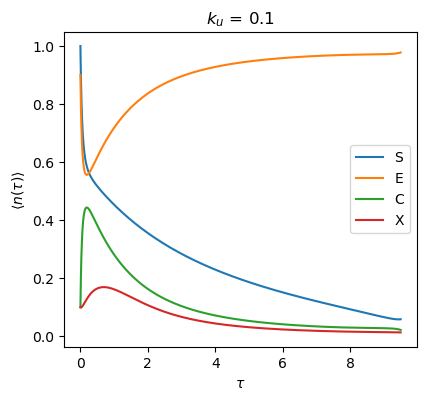

In [6]:
plot_indices = [1]#,4,7,10]

#plot_indices = [1,3]


figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(enzyme_system)))
        plot(SOL[plot_indices[i]].t,VAR[plot_indices[i]].μ[j,:],label=alpha_range[plot_indices[i]])
        legend(["S","E","C","X"])
    end
    title(L"$k_u$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")
end

gcf()

In [13]:
close("all")

In [37]:
f = 200
S0 = VAR[1].μ[1,f]
E0 = VAR[1].μ[2,f]
C0 = VAR[1].μ[3,f]
X0 = VAR[1].μ[4,f]
println(S0,E0,C0,X0)

0.075420756287363470.97075649392778480.029243506072215690.01497545516292558


In [ ]:

enzyme_system2 = @reaction_network begin
    @species S(t) = 0.07542075628736347 E(t) = 0.9707564939277848 C(t) = 0.02924350607221569 X(t) = 0.01497545516292558
    @parameters k_f = 1. k_b = 0.1 k_d = 1. k_2X = 2.
   (k_f,k_b), S + E <--> C
   (k_d), C --> E + X
   (k_2X), X --> 0 
end

@unpack k_f = enzyme_system2

SOL2 = []
VAR2 = []

for i in alpha_range[4]

    enzyme_system2.defaults[k_f] = i

    structure = Achedmy.ReactionStructure(enzyme_system2,false,VAR[1].N)
    variables = Achedmy.ReactionVariables(structure,"cross")
    #sol = Achedmy.solve_dynamics!(structure,variables,selfEnergy = "gSBR", tmax = 0.5*tmax, tstart = tstart, atol = atol, rtol = rtol , k_max = k_max, dtini = dtini)
    sol = Achedmy.solve_dynamics!(structure,variables,selfEnergy = "gSBR", tmax = 10., tstart = 9.5, atol = atol, rtol = rtol , k_max = k_max, dtini = dtini)


    push!(SOL2,sol)
    push!(VAR2,variables)

end


TypeError: TypeError: non-boolean (KadanoffBaym.GreenFunction{Float64, 4, Array{Float64, 4}, Response}) used in boolean context

In [12]:
## Saving data

open("../data/enzyme/sol_gSBR.jls", "w") do f
    serialize(f, SOL)
end
open("../data/enzyme/var_gSBR.jls", "w") do f
    serialize(f, VAR)
end

UndefVarError: UndefVarError: `SOL_gSBR` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### Plot the means:

In [12]:
alpha_range[7]

100.0

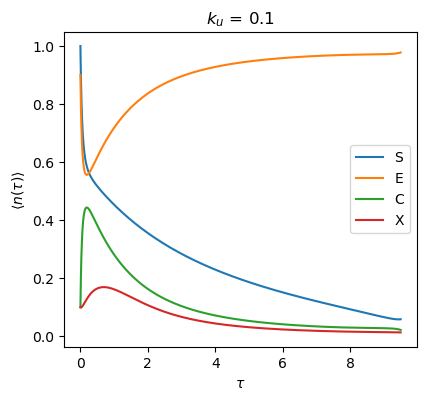

In [10]:
plot_indices = [1]#,4,7,10]

#plot_indices = [1,3]


figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(enzyme_system)))
        plot(SOL[plot_indices[i]].t,VAR[plot_indices[i]].μ[j,:],label=alpha_range[plot_indices[i]])
        legend(["S","E","C","X"])
    end
    title(L"$k_u$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")
end

gcf()

In [8]:
close()

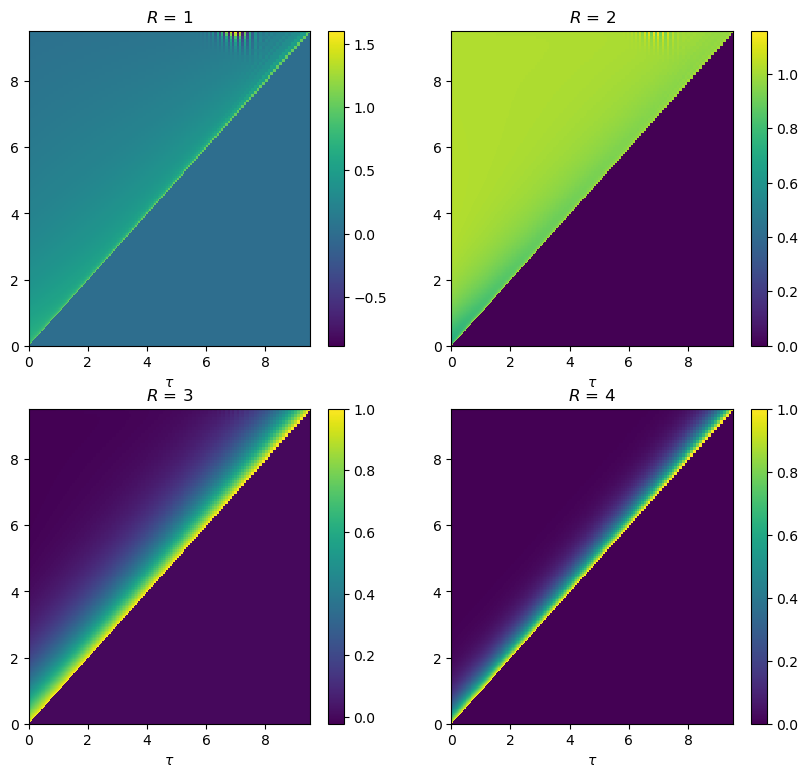

In [7]:
plot_indices = [1]#,4,7,10]

#plot_indices = [1,3]


figure(figsize=(10,9))
for i in range(1,4)
    subplot(2,2,i)
    #for j in range(1,length(species(enzyme_system)))
    pcolor(SOL[plot_indices[1]].t,SOL[plot_indices[1]].t,VAR[plot_indices[1]].R[i,i,:,:])
    colorbar()
    #legend(["S","E","C","X"])
    title(L"$R$ = " * string(i))
    #title(L"$k_u$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
    xlabel(L"$\tau$")
    #ylabel(L"$\langle n(\tau)\rangle$")
end
gcf()

In [8]:
close("all")

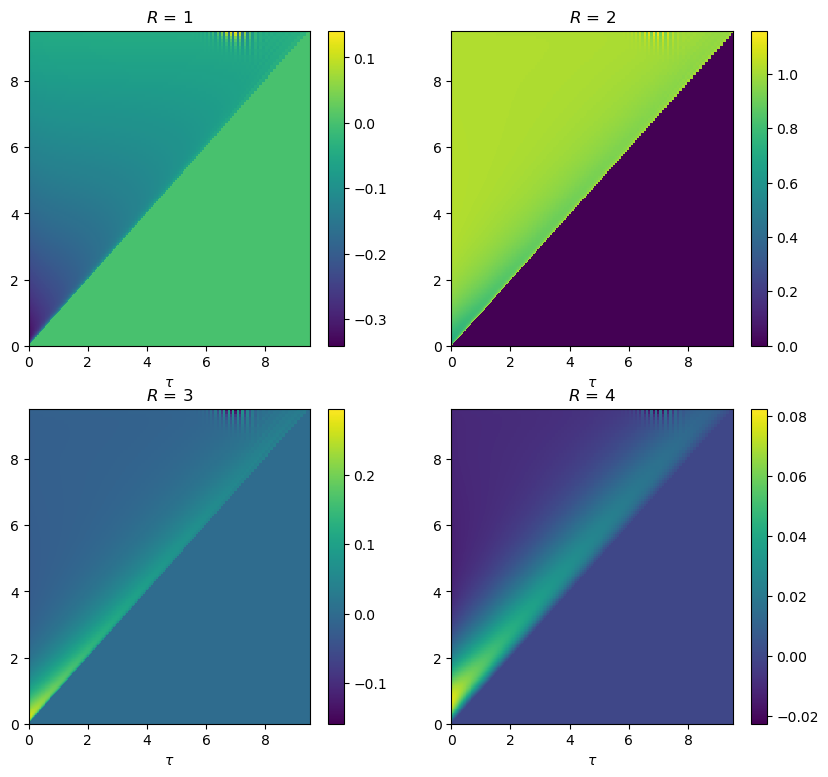

In [11]:
figure(figsize=(10,9))
for i in range(1,4)
    subplot(2,2,i)
    #for j in range(1,length(species(enzyme_system)))
    pcolor(SOL[plot_indices[1]].t,SOL[plot_indices[1]].t,VAR[plot_indices[1]].R[i,2,:,:])
    colorbar()
    #legend(["S","E","C","X"])
    title(L"$R$ = " * string(i))
    #title(L"$k_u$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
    xlabel(L"$\tau$")
    #ylabel(L"$\langle n(\tau)\rangle$")
end
gcf()

### Plot the variances:

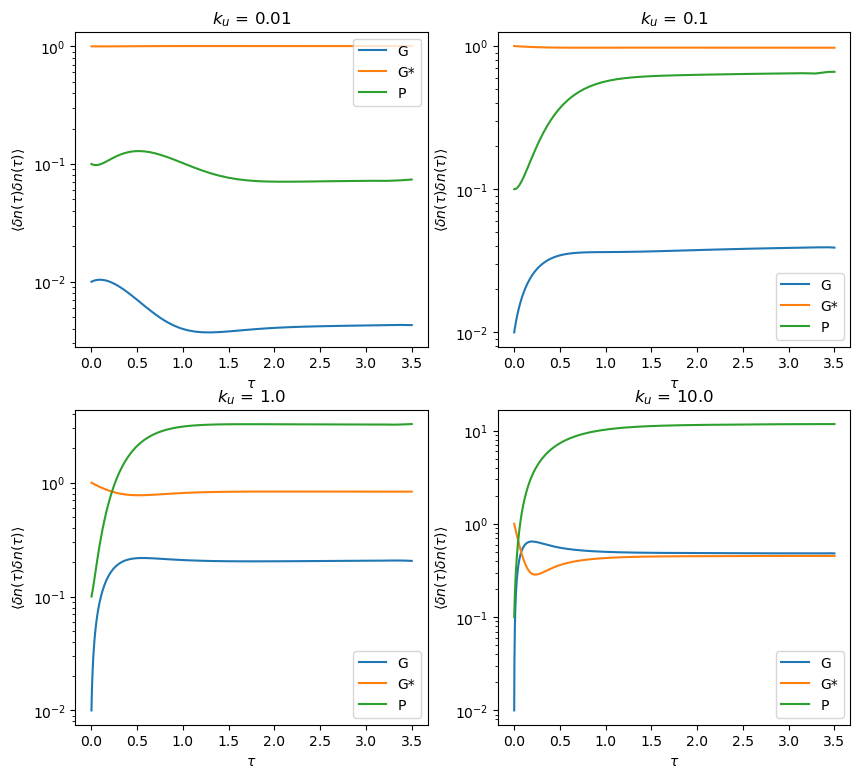

In [ ]:
#plot_indices = [1,4,7,10]
figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(gene_system)))
        plot(SOL[plot_indices[i]].t,VAR[plot_indices[i]].μ[j,:] + diag(VAR[plot_indices[i]].C[j,j,:,:]),label=alpha_range[plot_indices[i]])
        legend(["G","G*","P"])
    end
    title(L"$k_u$ = " * string(alpha_range[plot_indices[i]]))
    yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle \delta n(\tau) \delta n(\tau) \rangle$")
end

gcf()

In [23]:
close()

In [7]:
## Running MAK:
@unpack k_u = gene_system

SOL_mak = []
VAR_mak = []

for i in alpha_range
    gene_system.defaults[k_u] = i
    println(gene_system.defaults)

    structure = Achedmy.ReactionStructure(gene_system)
    variables = Achedmy.ReactionVariables(structure,"single")
    sol = Achedmy.solve_dynamics!(structure,variables,atol,rtol,tmax,tstart,"MAK");

    push!(SOL_mak,sol)
    push!(VAR_mak,variables)

end

open("../data/gene/sol_mak.jls", "w") do f
    serialize(f, SOL_mak)
end

open("../data/gene/var_mak.jls", "w") do f
    serialize(f, VAR_mak)
end


Dict{Any, Any}(G(t) => 0.01, G_star(t) => 1.0, k_b => 1.0, P(t) => 0.1, k_u => 0.01, k_t => 10.0, k_2P => 2.0)
t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 3.0999999999999995e-5
t: 7.620647033514596e-5
t: 0.00024737355505150086
t: 0.0008897068891845397
t: 0.0026128395031721273
t: 0.005570016553226458
t: 0.012749736512171355
t: 0.024058906971184617
t: 0.04473969595436488
t: 0.07347479636467016
t: 0.11759308130903759
t: 0.17348748631895394
t: 0.24910296808815197
t: 0.33248716358341557
t: 0.4288577753286289
t: 0.5394763897805044
t: 0.6611596994464126
t: 0.7944644775388976
t: 0.9389164213262882
t: 1.0931871077492117
t: 1.2566981920933302
t: 1.4287019504709746
t: 1.6083463380734333
t: 1.7949728946709667
t: 1.9879528272258704
t: 2.1866965686030295
t: 2.390702593175597
t: 2.599524788957927
t: 2.812768553307637
t: 3.0300941068070584
t: 3.251206165673931
t: 3.4758485884275223
  2.141216 seconds (5.11 M allocations: 253.293 MiB, 0.99% gc time, 98.44% compilation time)
Dict{Any, Any}(G(t) => 0.01,

### Plotting the cross variances $\langle \delta n_i(\tau)\delta n_j(\tau) \rangle$:

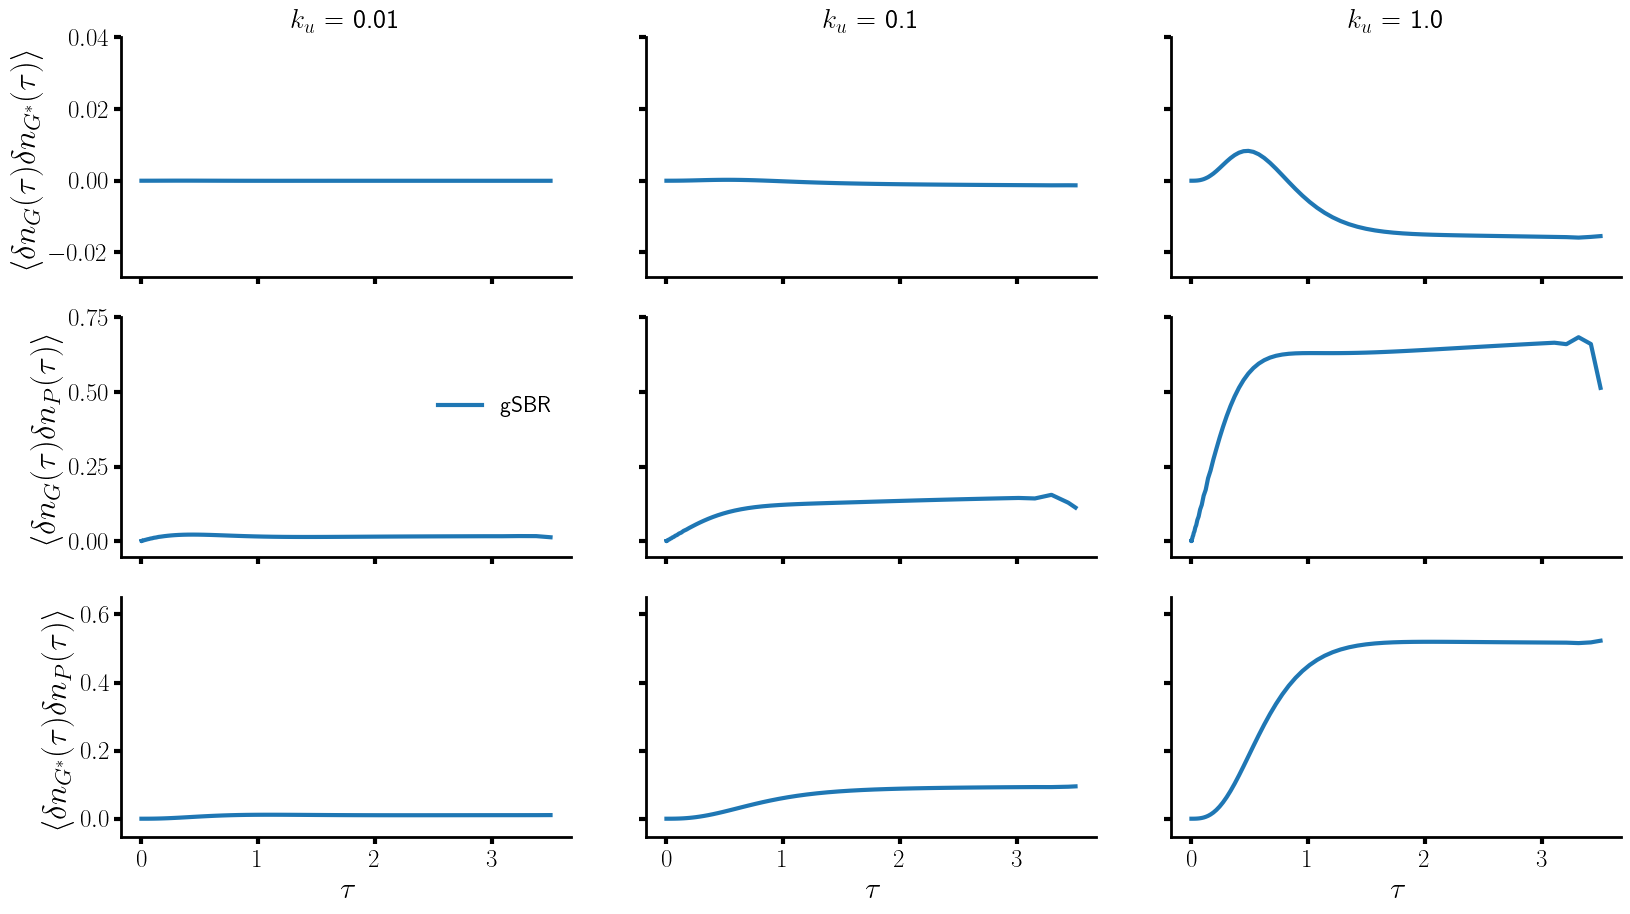

In [ ]:
fig1 = figure(figsize=(15,8))

ax_3 = fig1.add_axes([0.,0, 0.3, 0.3])
ax_4 = fig1.add_axes([0.35,0, 0.3, 0.3])

ax_1 = fig1.add_axes([0.,0.35, 0.3, 0.3])
ax_2 = fig1.add_axes([0.35,0.35, 0.3, 0.3])

ax_5 = fig1.add_axes([0.7,0.35, 0.3, 0.3])

ax_6 = fig1.add_axes([0.7,0., 0.3, 0.3])

ax_11 = fig1.add_axes([0.,0.7, 0.3, 0.3])
ax_22 = fig1.add_axes([0.35,0.7, 0.3, 0.3])

ax_55 = fig1.add_axes([0.7,0.7, 0.3, 0.3])

axes = [ax_1, ax_2, ax_5, ax_3, ax_4, ax_6, ax_11, ax_22, ax_55]
sat = [0, 3, 6] .+ 1
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in 1:length(sat)
    
    axes[i].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].C[1,3,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)

    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    axes[i].set_ylim((-0.055, 0.75))
    axes[i].set(xticklabels=[])
    if i != 1
        axes[i].set(yticklabels=[])
    end
end

axes[1].set_ylabel(L"\langle \delta n_G(\tau)\delta n_P(\tau) \rangle", fontsize=24)

for i in 1:length(sat)
    axes[i+3].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].C[2,3,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)

    axes[i+3].spines["right"].set_visible(false)
    axes[i+3].spines["top"].set_visible(false)
    axes[i+3].set_xlabel(L"\tau", fontsize=22)
    axes[i+3].set_ylim((-0.055, 0.65))
    if i != 1
        axes[i+3].set(yticklabels=[])
    end
end

axes[4].set_ylabel(L"\langle \delta n_{G^*}(\tau)\delta n_P(\tau) \rangle", fontsize=24)

for i in 1:length(sat)
    axes[i+6].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].C[1,2,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)

    axes[i+6].spines["right"].set_visible(false)
    axes[i+6].spines["top"].set_visible(false)
    axes[i+6].set(xticklabels=[])
    axes[i+6].set_title("\$k_u\$ = " * string(round(alpha_range[sat[i]], digits=2)), fontsize=20)
    axes[i+6].set_ylim((-0.027, 0.04))
    if i != 1
        axes[i+6].set(yticklabels=[])
    end
end

axes[7].set_ylabel(L"\langle \delta n_G(\tau)\delta n_{G^*}(\tau) \rangle", fontsize=24)

ax_1.legend(["gSBR"], bbox_to_anchor=(1., 0.75), loc=1, frameon=false, fontsize=16, ncol=1)

gcf()


In [ ]:
close()

### Plotting the two-time correlator PP $\langle \delta n_P(\tau) \delta n_P(\tau^\prime) \rangle$ :

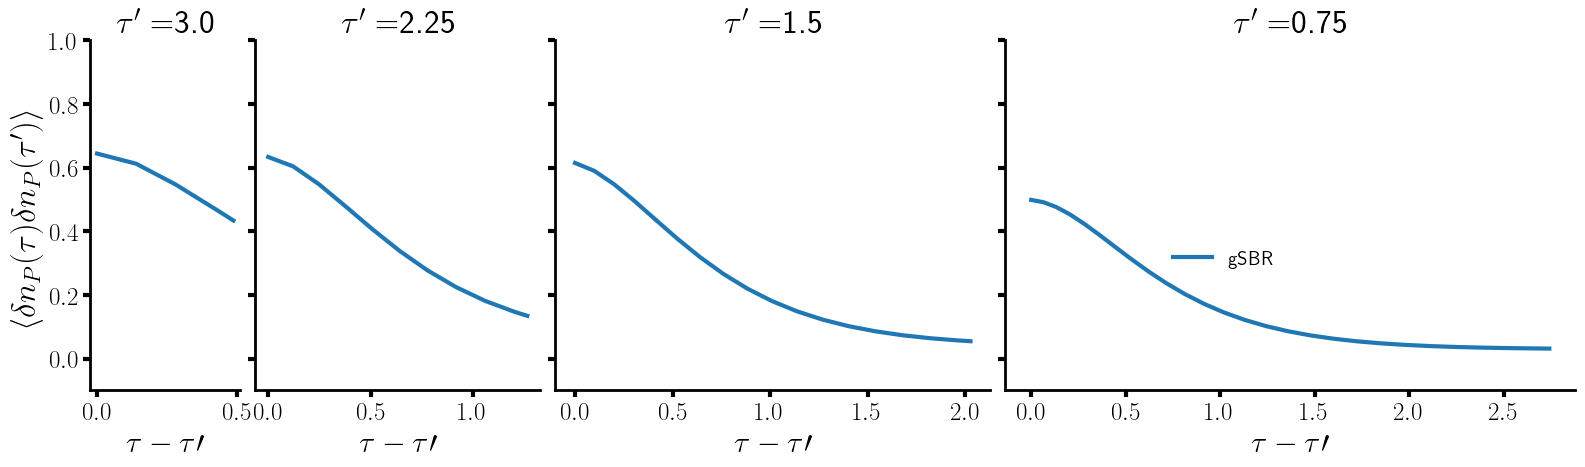

In [70]:
sat = 4

time_grid_gSBR = SOL[sat].t
plotting_tau =  [0.75, 1.5, 2.25, 3.0]

tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(tau)
    
    #[TODO] Change this!

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]], VAR[sat].C[3, 3, tau_SBR[j]:end, tau_SBR[j]] + VAR[sat].μ[3, tau_SBR[j]].*(VAR[sat].R[3, 3, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=1.,linewidth=3)
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]))
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 1))
end

ax1.set_ylabel(L"\langle \delta n_P(\tau) \delta n_P(\tau^\prime) \rangle ", fontsize=24)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR"], bbox_to_anchor=(0.5, 0.45), loc=0, frameon=false, fontsize=14)

gcf()

In [71]:
close()

### Plotting the response: $R_{PP}(\tau,\tau')$

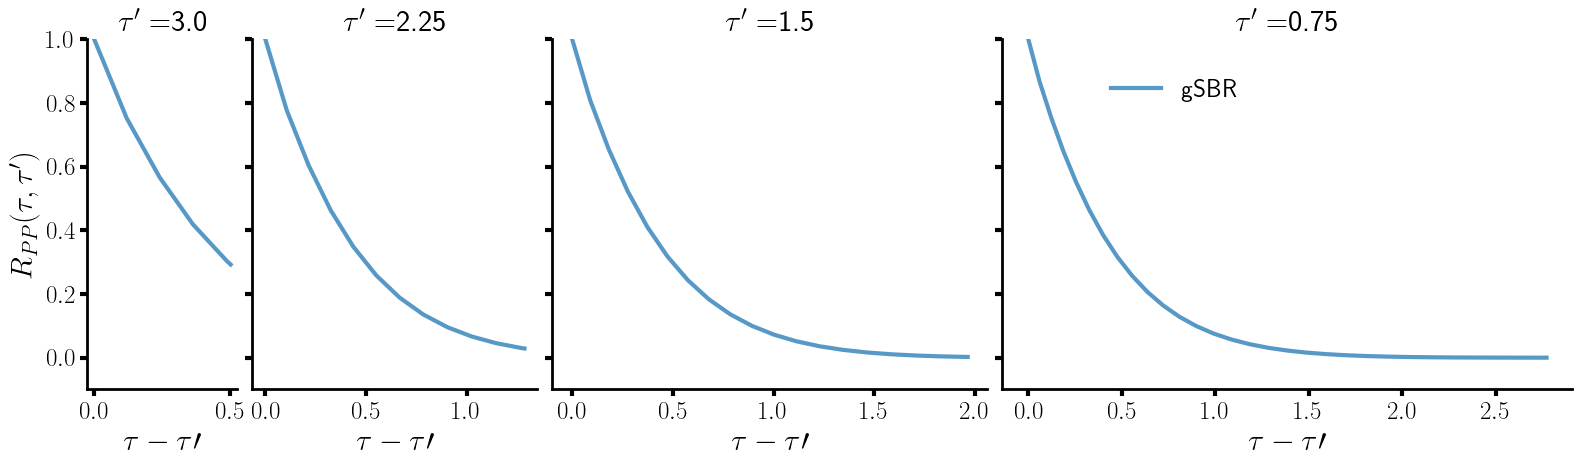

In [68]:
sat = 6

time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [0.75, 1.5, 2.25, 3.0]

tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(plotting_tau)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[3, 3, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 1.))
end

ax1.set_ylabel(L"R_{PP}(\tau,\tau^\prime)", fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

gcf()


In [69]:
close()

## Compare with other dynamical methods:

Note that now we use other libraries and code written in python for the implementation of other dynamical methods. They are NOT originally intended to be a part of the package.

In [15]:
using PyCall
using Pkg
using Conda

py"""
import sys
sys.path.append("../extras/other_dynamics")
"""

@pyimport cheMASTER
@pyimport emre

@pyimport numpy as np
@pyimport importlib

In [ ]:
# Setting up the reactions and the parameters:

num_species     = 3 #Number of species in the reaction system
num_interaction = 3 # Number of interating reactions in the Hamiltonian
num_reactions   = 2*num_species + num_interaction # This counts the total number of possible reactions in the system.
                                        # We have 2N creation and destruction reactions and the rest interaction reactions

# We take the order to be G,G*,P

# Rate constants for the reaction system: [k1 is Creation and k2 is Destruction]
k1 = np.array([0.,0.,0.]) #len must be equal to num_species
k2 = np.array([0.,0.,2.]) #len must be equal to num_species

k3 = np.array([10,1.,0.1]) 
s_i,r_i = np.zeros([num_interaction,num_species]),np.zeros([num_interaction,num_species])
rxn_par = [k1,k2,k3]

s_i[1,:] = [1,0,1] 
r_i[1,:] = [1,0,0]
s_i[2,:] = [0,1,0]
r_i[2,:] = [1,0,1]
s_i[3,:] = [1,0,1]
r_i[3,:] = [0,1,0]

#The initial concentration of the species. 
#Note: for Gillespie we start each trajectory from a Poisonian random variable with mean as the initial conc.below:
initial_values = np.array([0.01,1.,0.1])

dt = 0.05
tf = 3.5

3.5

In [17]:
#Run some Gillespie simulations
num_gill = 100
gill     = []

for i in range(1,num_gill)
    push!(gill,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.gillespie_avg(gill[i],1,initial_values,0,tf,dt,10000)
    print(gill[i])
end

PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3e0ae29f0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3e02a72f0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3e0ae1130>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d66dade0>

100%|##########| 1/1 [00:00<00:00, 12052.60it/s]


PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d66d8cb0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d67868d0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3e12a7440>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d65ca3c0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d65caae0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d65ca9c0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d65cbe60>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d65c9940>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d65cbe30>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d65cbd70>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d65c91f0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d65c8e00>PyObject <cheMASTER.chemical_system.chem

100%|##########| 1/1 [00:00<00:00, 16070.13it/s]


In [ ]:
#Plot settings!

cmap = plt.get_cmap("tab10")
col = [cmap(i) for i in np.linspace(0, 1, num_gill-75)]

original_rcParams = copy(plt.rcParams)
rcParams = PyDict(matplotlib["rcParams"])

plot_params = Dict("font.size" => 70, "font.family" => "sans-serif", "text.usetex" => true, "font.weight" => 900, "axes.linewidth" => 2, "xtick.major.width" => 3, "xtick.major.size" => 5, "xtick.minor.width" => 2, "xtick.minor.size" => 3, "ytick.major.width" => 3, "ytick.major.size" => 5, "ytick.minor.width" => 2, "ytick.minor.size" => 3, "axes.labelsize" => 18, "xtick.labelsize" => 18, "ytick.labelsize" => 18)
plot_params2 = (Dict(
    "text.usetex" => false,
    "xtick.labelsize" => 20,
    "ytick.labelsize" => 20,
    "xtick.major.width" => 3,
    "ytick.major.width" => 3,
    "xtick.major.size" => 10,
    "ytick.major.size" => 10,
    "xtick.direction" => "in",
    "ytick.direction" => "in",
    "font.size" => 30,
    "figure.autolayout" => true,
    "figure.figsize" => (10, 5),
    "axes.titlesize" => 20,
    "axes.labelsize" => 20,
    "lines.linewidth" => 3,
    "lines.markersize" => 3,
    "legend.fontsize" => 13,
    "mathtext.fontset" => "stix",
    "axes.linewidth" => 3
))

merge!(rcParams,plot_params)
merge!(rcParams,plot_params2)

PyDict{PyAny, PyAny, true} with 318 entries:
  "webagg.port"            => 8988
  "webagg.address"         => "127.0.0.1"
  "webagg.port_retries"    => 50
  "webagg.open_in_browser" => true
  "backend_fallback"       => false
  "interactive"            => false
  "figure.hooks"           => Any[]
  "toolbar"                => "toolbar2"
  "timezone"               => "UTC"
  "lines.linewidth"        => 1.5
  "lines.linestyle"        => "-"
  "lines.color"            => "C0"
  "lines.marker"           => "None"
  "lines.markerfacecolor"  => "auto"
  "lines.markeredgecolor"  => "auto"
  "lines.markeredgewidth"  => 1.0
  "lines.markersize"       => 6.0
  "lines.dash_joinstyle"   => "round"
  "lines.dash_capstyle"    => "butt"
  ⋮                        => ⋮

In [14]:
#import matplotlib


fig1  = plt.figure(figsize=(15,8))

ax_1 = fig1.add_axes([0.,0.525, 0.3, 0.4])
ax_2 = fig1.add_axes([0.35,0.525, 0.3, 0.4])
ax_3 = fig1.add_axes([0.7,0.525, 0.3, 0.4])

axes = [ax_1,ax_2,ax_3]
sat  = [0,3,6]
skip = 2
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in range(1,num_species)
    for j in range(1,num_gill-75)
        if all(gill[j].y[1,:] .- 3 .< 0.)
            #axes[i].plot(gill[j].timeGrid, gill[j].y[i,:], "--", c=colors[j], alpha=1., linewidth=3)
            axes[i].plot(gill[j].timeGrid[1:skip:end], gill[j].y[i,1:skip:end], "--", c=col[j], alpha=1., linewidth=3)
        end
    end
    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    #axes[i].set_title("Enzyme Sat = "+str(np.round(enzyme_sat[sat[i]],2)))
    #axes[i].set_title("$k_u$ = "+str(np.round(alpha_range[sat[i]],2)),fontsize=20)
    axes[i].set_xlabel(L"${\tau}$",fontsize=22)
end
axes[1].set_ylabel(L"$n_G$",fontsize=28)
axes[2].set_ylabel(L"$n_{G^*}$",fontsize=28)
axes[3].set_ylabel(L"$n_P$",fontsize=28)
plt.savefig("../plots/gene/gene_gillespie_new.png",bbox_inches="tight")
plt.close()

sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


## Run Master equation and EMRE solutions:

In [20]:
Master = []

for i in range(1,length(alpha_range))
    
    rxn_par[3][3] = alpha_range[i]

    push!(Master,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(Master[i],initial_values,0,tf,dt)
    cheMASTER.runDynamics(Master[i],max_num=[10,10,20],method = "Eigenvalue",crossCorrelator_tau="connected",variance=true)

    println(i)
end

1


100%|##########| 70/70 [02:08<00:00,  1.83s/it]


2


100%|##########| 70/70 [01:58<00:00,  1.70s/it]


3


100%|##########| 70/70 [02:08<00:00,  1.83s/it]


4


100%|##########| 70/70 [02:07<00:00,  1.82s/it]


5


100%|##########| 70/70 [02:07<00:00,  1.83s/it]


6


100%|##########| 70/70 [02:06<00:00,  1.81s/it]


7


100%|##########| 70/70 [01:55<00:00,  1.65s/it]


8


100%|##########| 70/70 [01:56<00:00,  1.67s/it]


9


100%|##########| 70/70 [01:56<00:00,  1.67s/it]


10


100%|##########| 70/70 [01:56<00:00,  1.66s/it]


In [25]:
open("../data/gene/master.jls", "w") do f
    serialize(f, Master)
end

In [27]:
EMRE   = []

for i in range(1,length(alpha_range))
    
    rxn_par[3][3] = alpha_range[i]
    push!(EMRE,emre.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    emre.initialize_dynamics(EMRE[i],initial_values,0,tf,dt,alpha=1.,volume=1.,measureResponse=true,crossCorrelator_tau=true)
    emre.runDynamics(EMRE[i])

    println(i)
end

1


69it [00:00, 3534.44it/s]             


2
3
4
5
6
7


69it [00:00, 3789.09it/s]             
69it [00:00, 3814.61it/s]             
69it [00:00, 3860.82it/s]             
69it [00:00, 3796.80it/s]             
69it [00:00, 3591.10it/s]             
69it [00:00, 3469.07it/s]             


8
9
10


69it [00:00, 3912.70it/s]             
69it [00:00, 3811.50it/s]             
69it [00:00, 3671.19it/s]             


In [28]:
open("../data/gene/emre.jls", "w") do f
    serialize(f, EMRE)
end

In [30]:
plot_params3 = (Dict(
    "font.size" => 20,
    "font.family" => "sans-serif",
    "text.usetex" => true,
    "font.weight" => 900,
    "axes.linewidth" => 2,
    "xtick.major.width" => 3,
    "xtick.major.size" => 5,
    "xtick.minor.width" => 2,
    "xtick.minor.size" => 3,
    "ytick.major.width" => 3,
    "ytick.major.size" => 5,
    "ytick.minor.width" => 2,
    "ytick.minor.size" => 3,
    "axes.labelsize" => 18,
    "xtick.labelsize" => 18,
    "ytick.labelsize" => 18,
    "font.size" => 20,
))

#rcParams = PyDict(matplotlib["rcParams"])
merge!(rcParams, plot_params3)

fig1 = plt.figure(figsize=(15, 8))

ax_3 = fig1.add_axes([0., 0, 0.3, 0.4])
ax_4 = fig1.add_axes([0.35, 0, 0.3, 0.4])

ax_1 = fig1.add_axes([0., 0.525, 0.3, 0.4])
ax_2 = fig1.add_axes([0.35, 0.525, 0.3, 0.4])

ax_5 = fig1.add_axes([0.7, 0.525, 0.3, 0.4])

ax_6 = fig1.add_axes([0.7, 0., 0.3, 0.4])

axes = [ax_1, ax_2, ax_5, ax_3, ax_4, ax_6]
sat = [0, 3, 6] .+ 1
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in 1:length(sat)
    for j in 1:num_species
        #axes[i].plot(QUAD2SBR[sat[i]].timeGrid[1:skip:end], QUAD2SBR[sat[i]].y[j, 1:skip:end]', linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        axes[i].plot(SOL[sat[i]].t, VAR[sat[i]].μ[j, :], linestyle="-", c=cOL[j], alpha=1., linewidth=3)

        #axes[i].plot(MAK[sat[i]].timeGrid[1:skip:end], MAK[sat[i]].y[j, 1:skip:end]', linestyle=(0, (1, 1)), c=cOL[j], alpha=1., linewidth=3)
        axes[i].plot(SOL_mak[sat[i]].t, VAR_mak[sat[i]].μ[j, :], linestyle=(0, (1, 1)), c=cOL[j], alpha=1., linewidth=3)
        
        axes[i].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].y[j, 1:skip:end]', "--", c=cOL[j], alpha=1., linewidth=3)
    end
    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    axes[i].set_title("\$k_u\$ = " * string(round(alpha_range[sat[i]], digits=2)), fontsize=20)
    axes[i].set_yscale("log")
    axes[i].set_ylim((0.002, 2.50))
    axes[i].set(xticklabels=[])
    if i != 1
        axes[i].set(yticklabels=[])
    end
end
axes[1].set_ylabel(L"$ \langle n(\tau) \rangle $", fontsize=24)

for i in 1:length(sat)
    for j in 1:num_species
        #axes[i + 3].plot(QUAD2SBR[sat[i]].timeGrid[1:skip:end], (QUAD2SBR[sat[i]].y[j, 1:skip:end] + diag(QUAD2SBR[sat[i]].corr[j, j, 1:skip:end, 1:skip:end]))', linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        
        axes[i + 3].plot(SOL[sat[i]].t, (VAR[sat[i]].μ[j,:] .+ diag(VAR[sat[i]].C[j, j, :, :])), linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        #[TODO] Change this! The variance doesn't exactly match right now!
        #axes[i + 3].plot(SOL[sat[i]].t, (VAR[sat[i]].μ[j,:]), linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        axes[i + 3].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[j, j, 1:skip:end]', linestyle="dotted", c=cOL[j], alpha=1., linewidth=3)
        axes[i + 3].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].variance[j, 1:skip:end]', "--", c=cOL[j], alpha=1., linewidth=3)
    end
    axes[i + 3].spines["right"].set_visible(false)
    axes[i + 3].spines["top"].set_visible(false)
    axes[i + 3].set_xlabel(L"$ \tau $", fontsize=22)
    axes[i + 3].set_yscale("log")
    axes[i + 3].set_ylim((0.002, 5.))
    if i != 1
        axes[i + 3].set(yticklabels=[])
    end
end
axes[4].set_ylabel(L"$\langle \delta n(\tau)\delta n(\tau) \rangle $", fontsize=24)

axes[1].legend(["G, gSBR", "G, MAK", "G, Master", "G*, gSBR", "G*, MAK", "G*, Master", "P, gSBR", "P, MAK", "P, Master"], bbox_to_anchor=(1.06, 0.89), loc=1, frameon=false, fontsize=13, ncol=3)
axes[6].legend(["G, gSBR","G, LNA","G, Master","G*, gSBR","G*, LNA","G*, Master","P, gSBR","P, LNA","P, Master"],bbox_to_anchor=(1.1, 0.35), loc=1, frameon=false, fontsize=13,ncol=3)

plt.savefig("../plots/gene/gene_means_variance.png", bbox_inches="tight")
plt.close()


In [51]:
function find_closed_timegrid_indices(timegrid, times)
    return [findmin(abs.(timegrid .- X))[2] for X in times]
end

find_closed_timegrid_indices (generic function with 1 method)

In [72]:
sat = 4

time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [0.75, 1.5, 2.25, 3.0]

tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(tau)
    
    #[TODO] Change this!

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]], VAR[sat].C[3, 3, tau_SBR[j]:end, tau_SBR[j]] + VAR[sat].μ[3, tau_SBR[j]].*(VAR[sat].R[3, 3, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    
    #axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]], VAR[sat].N[3, 3, tau_SBR[j]:end, tau_SBR[j]], "-", alpha=0.75)

    axis[j].plot(time_grid_all[1:end-tau[j]], EMRE[sat].corr[3, 3, tau[j]+1:end, tau[j]], linestyle="dashdot", alpha=0.75,linewidth=3)

    axis[j].plot(Master[sat].timeGrid[1:end-tau[j]], Master[sat].correlator_tau[3, 3, 1:end-tau[j], tau[j]], "--", alpha=0.75, color="gray",linewidth=3)

    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]))
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 2))
end

ax1.set_ylabel(L"\langle \delta n_P(\tau) \delta n_P(\tau^\prime) \rangle ", fontsize=24)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(0.5, 0.45), loc=0, frameon=false, fontsize=14)

plt.savefig("../plots/gene/gene_num_corr_P.png", bbox_inches="tight")
plt.close()

In [48]:
fig1 = figure(figsize=(15,8))

ax_3 = fig1.add_axes([0.,0, 0.3, 0.3])
ax_4 = fig1.add_axes([0.35,0, 0.3, 0.3])

ax_1 = fig1.add_axes([0.,0.35, 0.3, 0.3])
ax_2 = fig1.add_axes([0.35,0.35, 0.3, 0.3])

ax_5 = fig1.add_axes([0.7,0.35, 0.3, 0.3])

ax_6 = fig1.add_axes([0.7,0., 0.3, 0.3])

ax_11 = fig1.add_axes([0.,0.7, 0.3, 0.3])
ax_22 = fig1.add_axes([0.35,0.7, 0.3, 0.3])

ax_55 = fig1.add_axes([0.7,0.7, 0.3, 0.3])

axes = [ax_1, ax_2, ax_5, ax_3, ax_4, ax_6, ax_11, ax_22, ax_55]
sat = [0, 3, 6] .+ 1
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in 1:length(sat)
    
    axes[i].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[1,3,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[i].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[1,3,1:skip:end], linestyle="dashdot", c=cOL[2], alpha=1., linewidth=3)
    axes[i].plot(Master[sat[i]].timeGrid[1:end], Master[sat[i]].correlator_tau[1,3,1,1:end], "--", c="gray", alpha=1., linewidth=3)
    #axes[i].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].correlator_tau[1,3,1:skip:end,1], "--", c="gray", alpha=1., linewidth=3)


    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    axes[i].set_ylim((-0.055, 0.75))
    axes[i].set(xticklabels=[])
    if i != 1
        axes[i].set(yticklabels=[])
    end
end

axes[1].set_ylabel(L"\langle \delta n_G(\tau)\delta n_P(\tau) \rangle", fontsize=24)

for i in 1:length(sat)
    axes[i+3].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[2,3,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[i+3].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[2,3,1:skip:end], linestyle="dashdot", c=cOL[2], alpha=1., linewidth=3)
    axes[i+3].plot(Master[sat[i]].timeGrid[1:end], Master[sat[i]].correlator_tau[2,3,1,1:end], "--", c="gray", alpha=1., linewidth=3)
    #axes[i+3].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].correlator_tau[2,3,1:skip:end,1], "--", c="gray", alpha=1., linewidth=3)


    axes[i+3].spines["right"].set_visible(false)
    axes[i+3].spines["top"].set_visible(false)
    axes[i+3].set_xlabel(L"\tau", fontsize=22)
    axes[i+3].set_ylim((-0.055, 0.65))
    if i != 1
        axes[i+3].set(yticklabels=[])
    end
end

axes[4].set_ylabel(L"\langle \delta n_{G^*}(\tau)\delta n_P(\tau) \rangle", fontsize=24)

for i in 1:length(sat)
    axes[i+6].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[1,2,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[i+6].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[1,2,1:skip:end], linestyle="dashdot", c=cOL[2], alpha=1., linewidth=3)
    axes[i+6].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].correlator_tau[1,2,1,1:end], "--", c="gray", alpha=1., linewidth=3)

    axes[i+6].spines["right"].set_visible(false)
    axes[i+6].spines["top"].set_visible(false)
    axes[i+6].set(xticklabels=[])
    axes[i+6].set_title("\$k_u\$ = " * string(round(alpha_range[sat[i]], digits=2)), fontsize=20)
    axes[i+6].set_ylim((-0.027, 0.04))
    if i != 1
        axes[i+6].set(yticklabels=[])
    end
end

axes[7].set_ylabel(L"\langle \delta n_G(\tau)\delta n_{G^*}(\tau) \rangle", fontsize=24)

ax_1.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(1., 0.75), loc=1, frameon=false, fontsize=16, ncol=1)

plt.savefig("../plots/gene/gene_equal_time_corr.png", bbox_inches="tight")
plt.close()


In [49]:
Master_response = []

#This is calculation intensive, be careful!

for i in range(1,length(alpha_range))
    
    rxn_par[3][3] = alpha_range[i]
    rxn_par[1]    = rxn_par[1] .+ 0.001

    push!(Master_response,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(Master_response[i],initial_values,0,tf,0.1*dt)
    cheMASTER.runDynamics(Master_response[i],max_num=[10,10,20],method = "Euler",measureResponse="finite-cross",measureResponse_par=[1.1,1])
    
    println(i)

end
rxn_par[1] = k1

1


100%|##########| 70/70 [07:30<00:00,  6.44s/it]


2


100%|##########| 70/70 [07:30<00:00,  6.44s/it]


3


100%|##########| 70/70 [07:24<00:00,  6.35s/it]


4


100%|##########| 70/70 [07:20<00:00,  6.29s/it]


5


100%|##########| 70/70 [07:20<00:00,  6.29s/it]


6


100%|##########| 70/70 [07:26<00:00,  6.38s/it]


7


100%|##########| 70/70 [07:26<00:00,  6.37s/it]


8


100%|##########| 70/70 [07:26<00:00,  6.38s/it]


9


100%|##########| 70/70 [07:23<00:00,  6.33s/it]


10


100%|##########| 70/70 [07:23<00:00,  6.34s/it]


Base.Meta.ParseError: ParseError:
# Error @ /Users/harsh/Work/code/achedmy/examples/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y143sZmlsZQ==.jl:18:34
open("../data/gene/Master_response.jls", "w") do f
    serialize(f, Master_response)
#                                └ ── Expected `end`

In [ ]:
i = 6 

rxn_par[3][3] = alpha_range[i]
rxn_par[1]    = rxn_par[1] .+ 0.001

Master_response[i] = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
#push!(Master_response,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
cheMASTER.initialize_dynamics(Master_response[i],initial_values,0,tf,0.1*dt)
cheMASTER.runDynamics(Master_response[i],max_num=[10,10,20],method = "Euler",measureResponse="finite-cross",measureResponse_par=[1.1,1])

rxn_par[1] = k1

In [52]:
open("../data/gene/Master_response.jls", "w") do f
    serialize(f, Master_response)
end

In [ ]:
sat = 6

time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [0.75, 1.5, 2.25, 3.0]

tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(plotting_tau)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[3, 3, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)

    axis[j].plot(time_grid_all[1:end-tau[j]], EMRE[sat].resp[3, 3, tau[j]+1:end, tau[j]], linestyle="dashdot", alpha=0.75,linewidth=3)

    axis[j].plot(Master_response[sat].timeGrid[1:end-tau[j]], Master_response[sat].Response[3, 3, 1:end-tau[j], tau[j]], "--", alpha=0.75, color="gray",linewidth=3)
    
    #axis[j].plot(time_grid_all[1:end-tau[j]], respALL_2[2, 2, 1:end-tau[j], tau[j]], "-", alpha=1., linewidth=3)
    #axis[j].plot(time_grid_all[1:end-tau[j]], respLNA_2[2, 2, 1:end-tau[j], tau[j]], linestyle="dashdot", alpha=1., linewidth=3)
    #axis[j].plot(time_grid_all[1:end-tau[j]], respME_2[2, 2, 1:end-tau[j], tau[j]], "--", alpha=1., linewidth=3, color="gray")
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 1.))
end

ax1.set_ylabel(L"R_{PP}(\tau,\tau^\prime)", fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

gcf()


In [ ]:
close()

### Plotting the time averaged trajectory errors:


In [ ]:
#import Pkg; Pkg.add("Interpolations")
using Interpolations

function time_averaged_trajectory_error(sys_mean, sys_t, sys_ref_mean, sys_ref_t)
    #Interpolates the timegrid of sys_ref to sys and calculates the error

    interp_ref_mean = interpolate((sys_ref_t,), sys_ref_mean, Gridded(Linear()))

    interp_ref_mean_vals = [interp_ref_mean(sys_t[i]) for i in 1:length(sys_t) if sys_t[i] < maximum(sys_ref_t)]

    error = sum(abs, sys_mean[1:length(interp_ref_mean_vals)] ./ interp_ref_mean_vals .- 1 ) / length(sys_t)
    
    return error

end

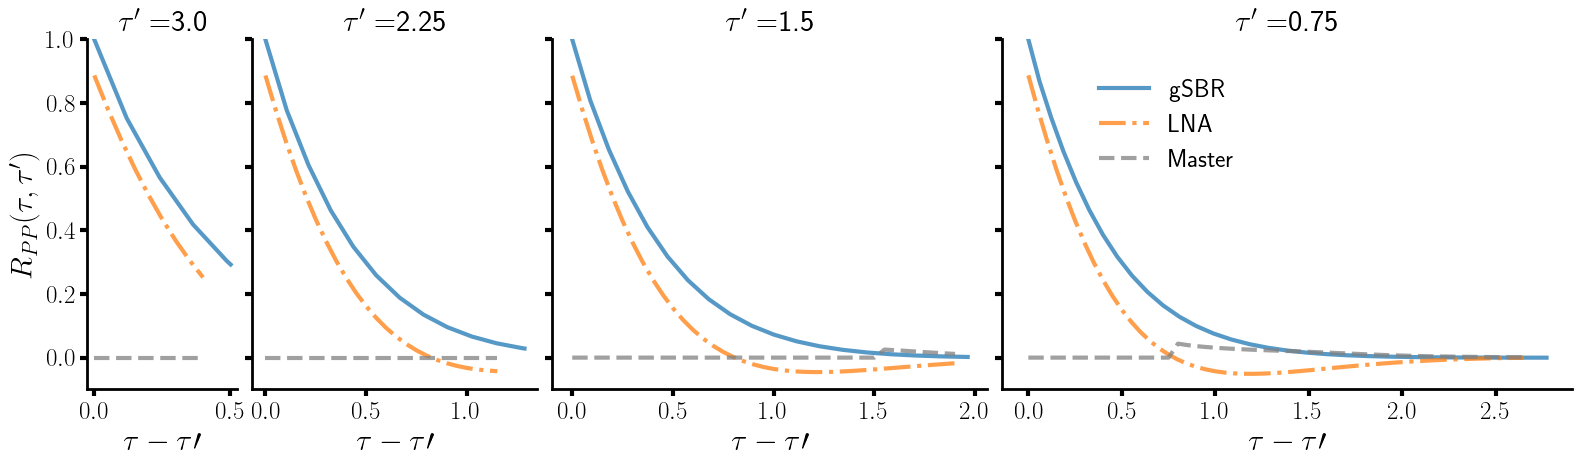

In [67]:
close()